# Web Scraping with [Python](https://www.python.org/) using [`BeautifulSoup`](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) and [`requests`](https://2.python-requests.org/en/master/)

The task is to scarpe user reviews of a Beiersdorf product and analyse its content by generating a wordcloud.

__Set up__

In [1]:
%load_ext autoreload
%autoreload 2

__Importieren von Python Bibliotheken__

In [2]:
import sys
from bs4 import BeautifulSoup
import requests

**Add path to look for modules**

In [3]:
import sys
sys.path.append("../src")

In [4]:
import helper_functions as hf

## Multiple (sub)websites

In [5]:
url = 'https://www.beautyheaven.com.au/mum-baby/baby-skin/710-nivea-creme-nivea-creme'

In [6]:
??hf.generate_urls

Signature: hf.generate_urls(url, pages)
Source:   
def generate_urls(url, pages):
    '''
    Function to extend an url with the form "?page=i", where i is is an integer
    : url: string
    : pages: tuple(start, end)
    '''
    r = range(pages[0], pages[1]+1)
    urls = [url]
    for i in r:
        urls.append(f'{url}?page={i}')
    return urls
File:      ~/Documents/hello-world-academy/Beiersdorf_2019/beiersdorf-2019/05_webscraping_with_python/src/helper_functions.py
Type:      function


In [7]:
urls = hf.generate_urls(url=url, pages=(1,15))
urls

['https://www.beautyheaven.com.au/mum-baby/baby-skin/710-nivea-creme-nivea-creme',
 'https://www.beautyheaven.com.au/mum-baby/baby-skin/710-nivea-creme-nivea-creme?page=1',
 'https://www.beautyheaven.com.au/mum-baby/baby-skin/710-nivea-creme-nivea-creme?page=2',
 'https://www.beautyheaven.com.au/mum-baby/baby-skin/710-nivea-creme-nivea-creme?page=3',
 'https://www.beautyheaven.com.au/mum-baby/baby-skin/710-nivea-creme-nivea-creme?page=4',
 'https://www.beautyheaven.com.au/mum-baby/baby-skin/710-nivea-creme-nivea-creme?page=5',
 'https://www.beautyheaven.com.au/mum-baby/baby-skin/710-nivea-creme-nivea-creme?page=6',
 'https://www.beautyheaven.com.au/mum-baby/baby-skin/710-nivea-creme-nivea-creme?page=7',
 'https://www.beautyheaven.com.au/mum-baby/baby-skin/710-nivea-creme-nivea-creme?page=8',
 'https://www.beautyheaven.com.au/mum-baby/baby-skin/710-nivea-creme-nivea-creme?page=9',
 'https://www.beautyheaven.com.au/mum-baby/baby-skin/710-nivea-creme-nivea-creme?page=10',
 'https://www.be

## Fetching the content of several websites using `requests` and  `BeautifulSoup`

In [18]:
headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64;     x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate",     "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}
reviews = ''
for url in urls:
    print(f'Processing url {url}')
    page = requests.get(url, headers=headers)
    soup = BeautifulSoup(page.content, 'html.parser')
    text = hf.extract_text_from_soup(soup)
    reviews = reviews + " " + text
    print(f'There are {len(text.split())} words extracted.\n')

Processing url https://www.beautyheaven.com.au/mum-baby/baby-skin/710-nivea-creme-nivea-creme
There are 1918 words extracted.

Processing url https://www.beautyheaven.com.au/mum-baby/baby-skin/710-nivea-creme-nivea-creme?page=1
There are 2158 words extracted.

Processing url https://www.beautyheaven.com.au/mum-baby/baby-skin/710-nivea-creme-nivea-creme?page=2
There are 2389 words extracted.

Processing url https://www.beautyheaven.com.au/mum-baby/baby-skin/710-nivea-creme-nivea-creme?page=3
There are 1561 words extracted.

Processing url https://www.beautyheaven.com.au/mum-baby/baby-skin/710-nivea-creme-nivea-creme?page=4
There are 1545 words extracted.

Processing url https://www.beautyheaven.com.au/mum-baby/baby-skin/710-nivea-creme-nivea-creme?page=5
There are 1333 words extracted.

Processing url https://www.beautyheaven.com.au/mum-baby/baby-skin/710-nivea-creme-nivea-creme?page=6
There are 1139 words extracted.

Processing url https://www.beautyheaven.com.au/mum-baby/baby-skin/710

In [11]:
#soup

## Generating a word cloud

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

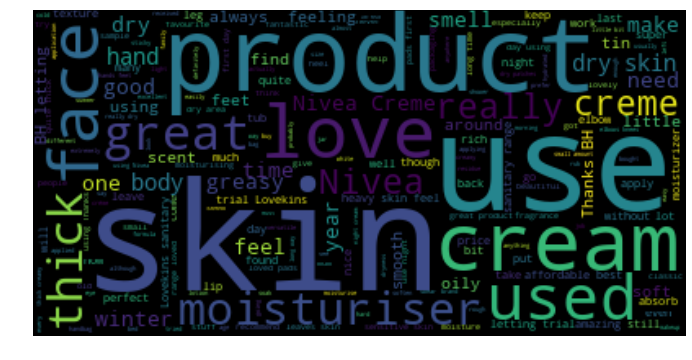

In [20]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(reviews)


# Display the generated image:
fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off");

### Playing around with wordclouds

In [25]:
#?WordCloud

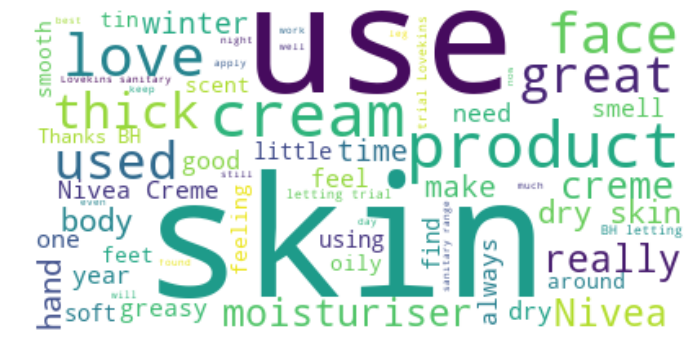

In [26]:
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white",
                      max_words=60,
                      mode="RGB",
                      relative_scaling=0.5,
                      random_state=42
                    ).generate(reviews)


# Display the generated image:
fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off");

#### Using masks

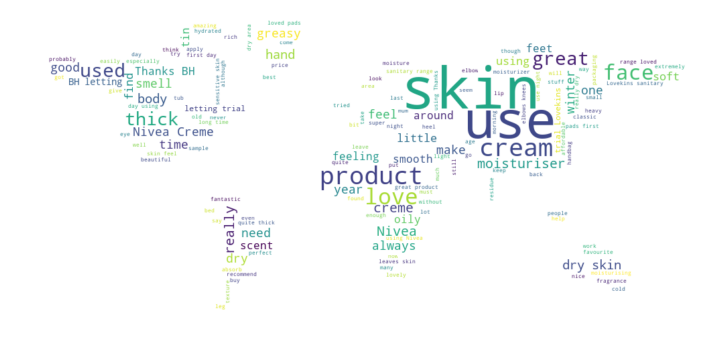

In [27]:
from PIL import Image
import numpy as np
mask = np.array(Image.open("../data/images/world.png"))   #choose mask

# Create and generate a word cloud image:
wordcloud = WordCloud(
    background_color="white",
                    mask=mask,
                    max_words=150,
                    width=800,
                    height=400,
                    mode="RGB",
                    random_state=42
                    ).generate(reviews)


# Display the generated image:
fig, ax = plt.subplots(figsize=(12,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off");

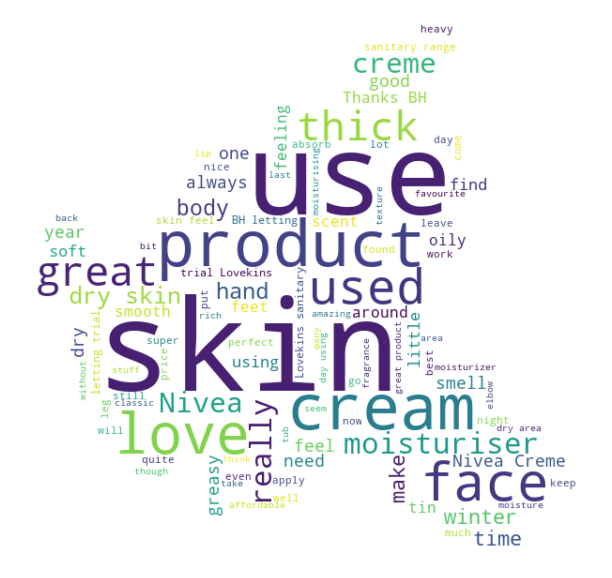

In [28]:
mask = np.array(Image.open("../data/images/Hamburg_Umriss.png"))   #choose mask

# Create and generate a word cloud image:
wordcloud = WordCloud(
    background_color="white",
                    mask=mask,
                    max_words=100,
                    width=800,
                    height=400,
                    mode="RGB",
                    random_state=42
                    ).generate(reviews)


# Display the generated image:
fig, ax = plt.subplots(figsize=(12,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off");

***